<a href="https://colab.research.google.com/github/Hetvi48/AeroCare/blob/main/Advance_DataSet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [ ]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

In [ ]:
df_train = pd.read_csv('drive/MyDrive/archive/CMaps/train_FD002.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
df_test = pd.read_csv('drive/MyDrive/archive/CMaps/test_FD002.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
df_test_RUL = pd.read_csv('drive/MyDrive/archive/CMaps/RUL_FD002.txt',sep=r'\s+',header=None,index_col=False,names=['RUL'])

In [ ]:
df_train.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio(P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,1.02,42.02,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,1.02,42.20,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,1915.11,8001.42,0.94,36.69,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,2211.58,8303.96,1.02,41.96,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,1915.10,7993.23,0.94,36.89,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   53759 non-null  int64  
 1   cycle                                    53759 non-null  int64  
 2   setting_1                                53759 non-null  float64
 3   setting_2                                53759 non-null  float64
 4   setting_3                                53759 non-null  float64
 5   (Fan inlet temperature) (◦R)             53759 non-null  float64
 6   (LPC outlet temperature) (◦R)            53759 non-null  float64
 7   (HPC outlet temperature) (◦R)            53759 non-null  float64
 8   (LPT outlet temperature) (◦R)            53759 non-null  float64
 9   (Fan inlet Pressure) (psia)              53759 non-null  float64
 10  (bypass-duct pressure) (psia)            53759

In [ ]:
df_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
engine,53759.0,131.082981,74.463862,1.0000,68.0000,131.0000,195.0000,260.0000
cycle,53759.0,109.154746,69.180569,1.0000,52.0000,104.0000,157.0000,378.0000
setting_1,53759.0,23.998407,14.747376,0.0000,10.0046,25.0013,41.9980,42.0080
setting_2,53759.0,0.572056,0.310016,0.0000,0.2507,0.7000,0.8400,0.8420
setting_3,53759.0,94.046020,14.237735,60.0000,100.0000,100.0000,100.0000,100.0000
(Fan inlet temperature) (◦R),53759.0,472.910207,26.389707,445.0000,445.0000,462.5400,491.1900,518.6700
(LPC outlet temperature) (◦R),53759.0,579.672399,37.289399,535.5300,549.5700,555.9800,607.3400,644.5200
(HPC outlet temperature) (◦R),53759.0,1419.971013,105.946341,1243.7300,1352.7600,1369.1800,1499.3700,1612.8800
(LPT outlet temperature) (◦R),53759.0,1205.442024,119.123428,1023.7700,1123.6550,1138.8900,1306.8500,1439.2300
(Fan inlet Pressure) (psia),53759.0,8.031986,3.613839,3.9100,3.9100,7.0500,10.5200,14.6200


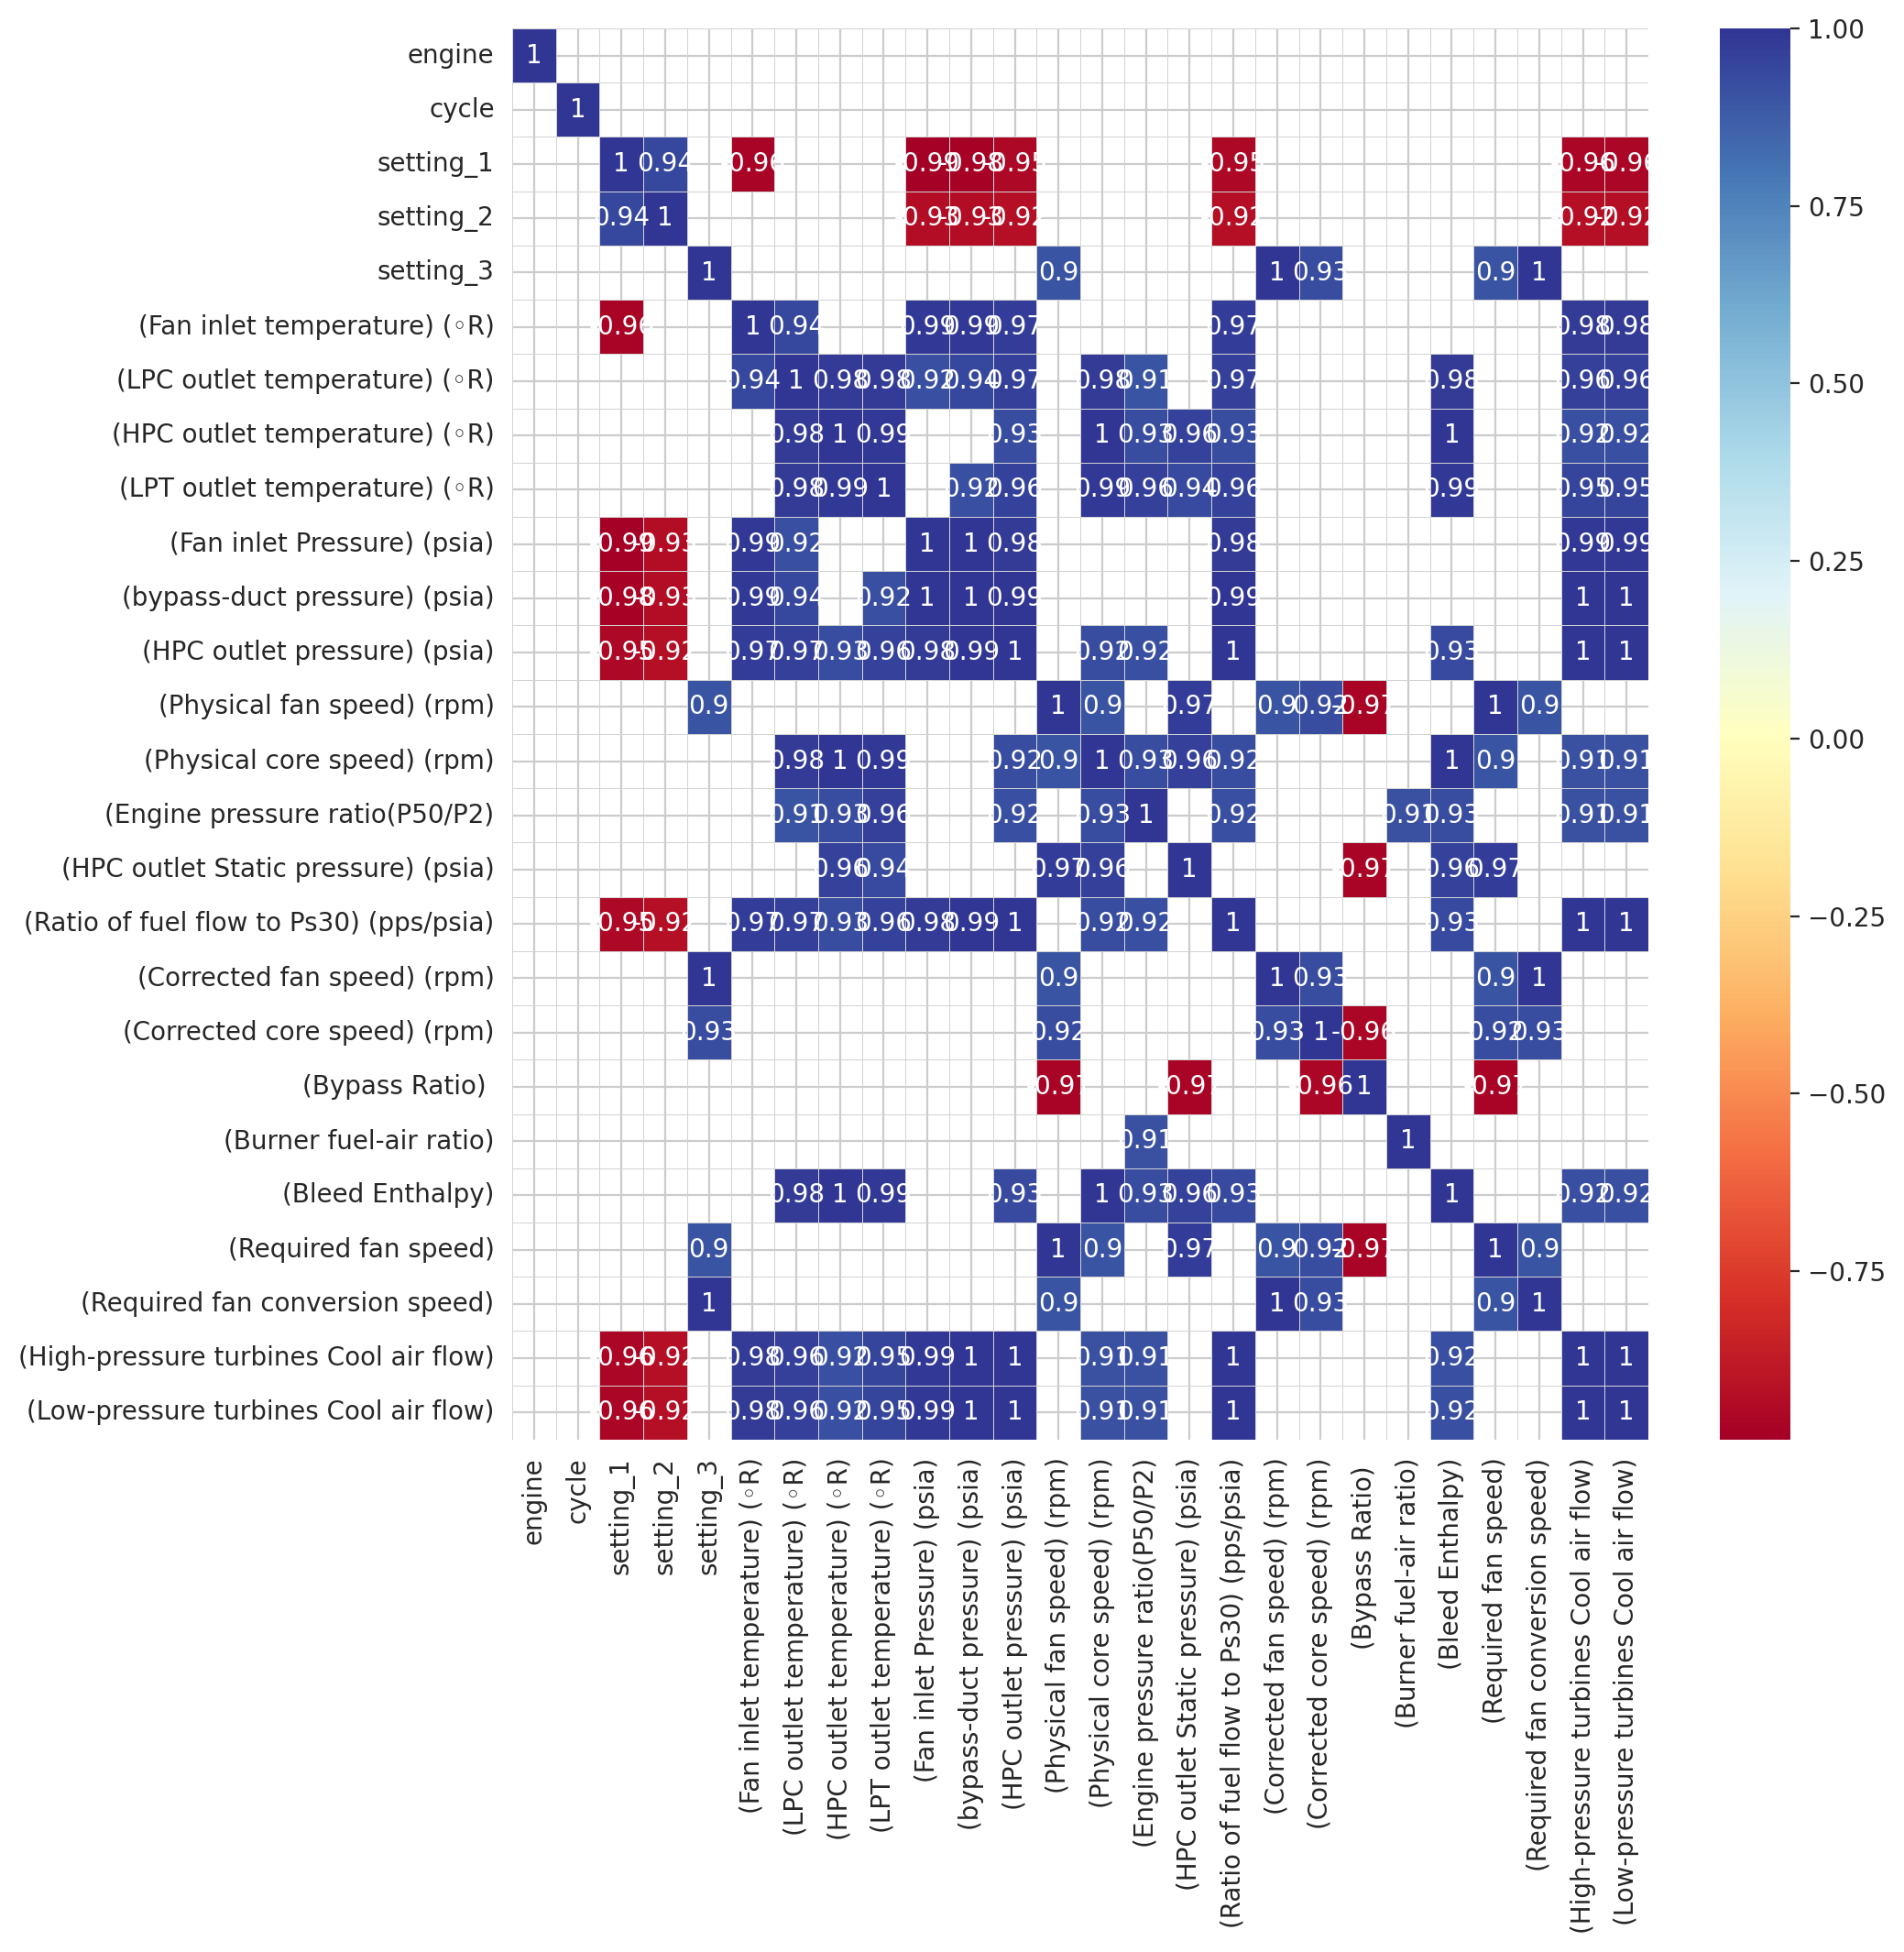

In [ ]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

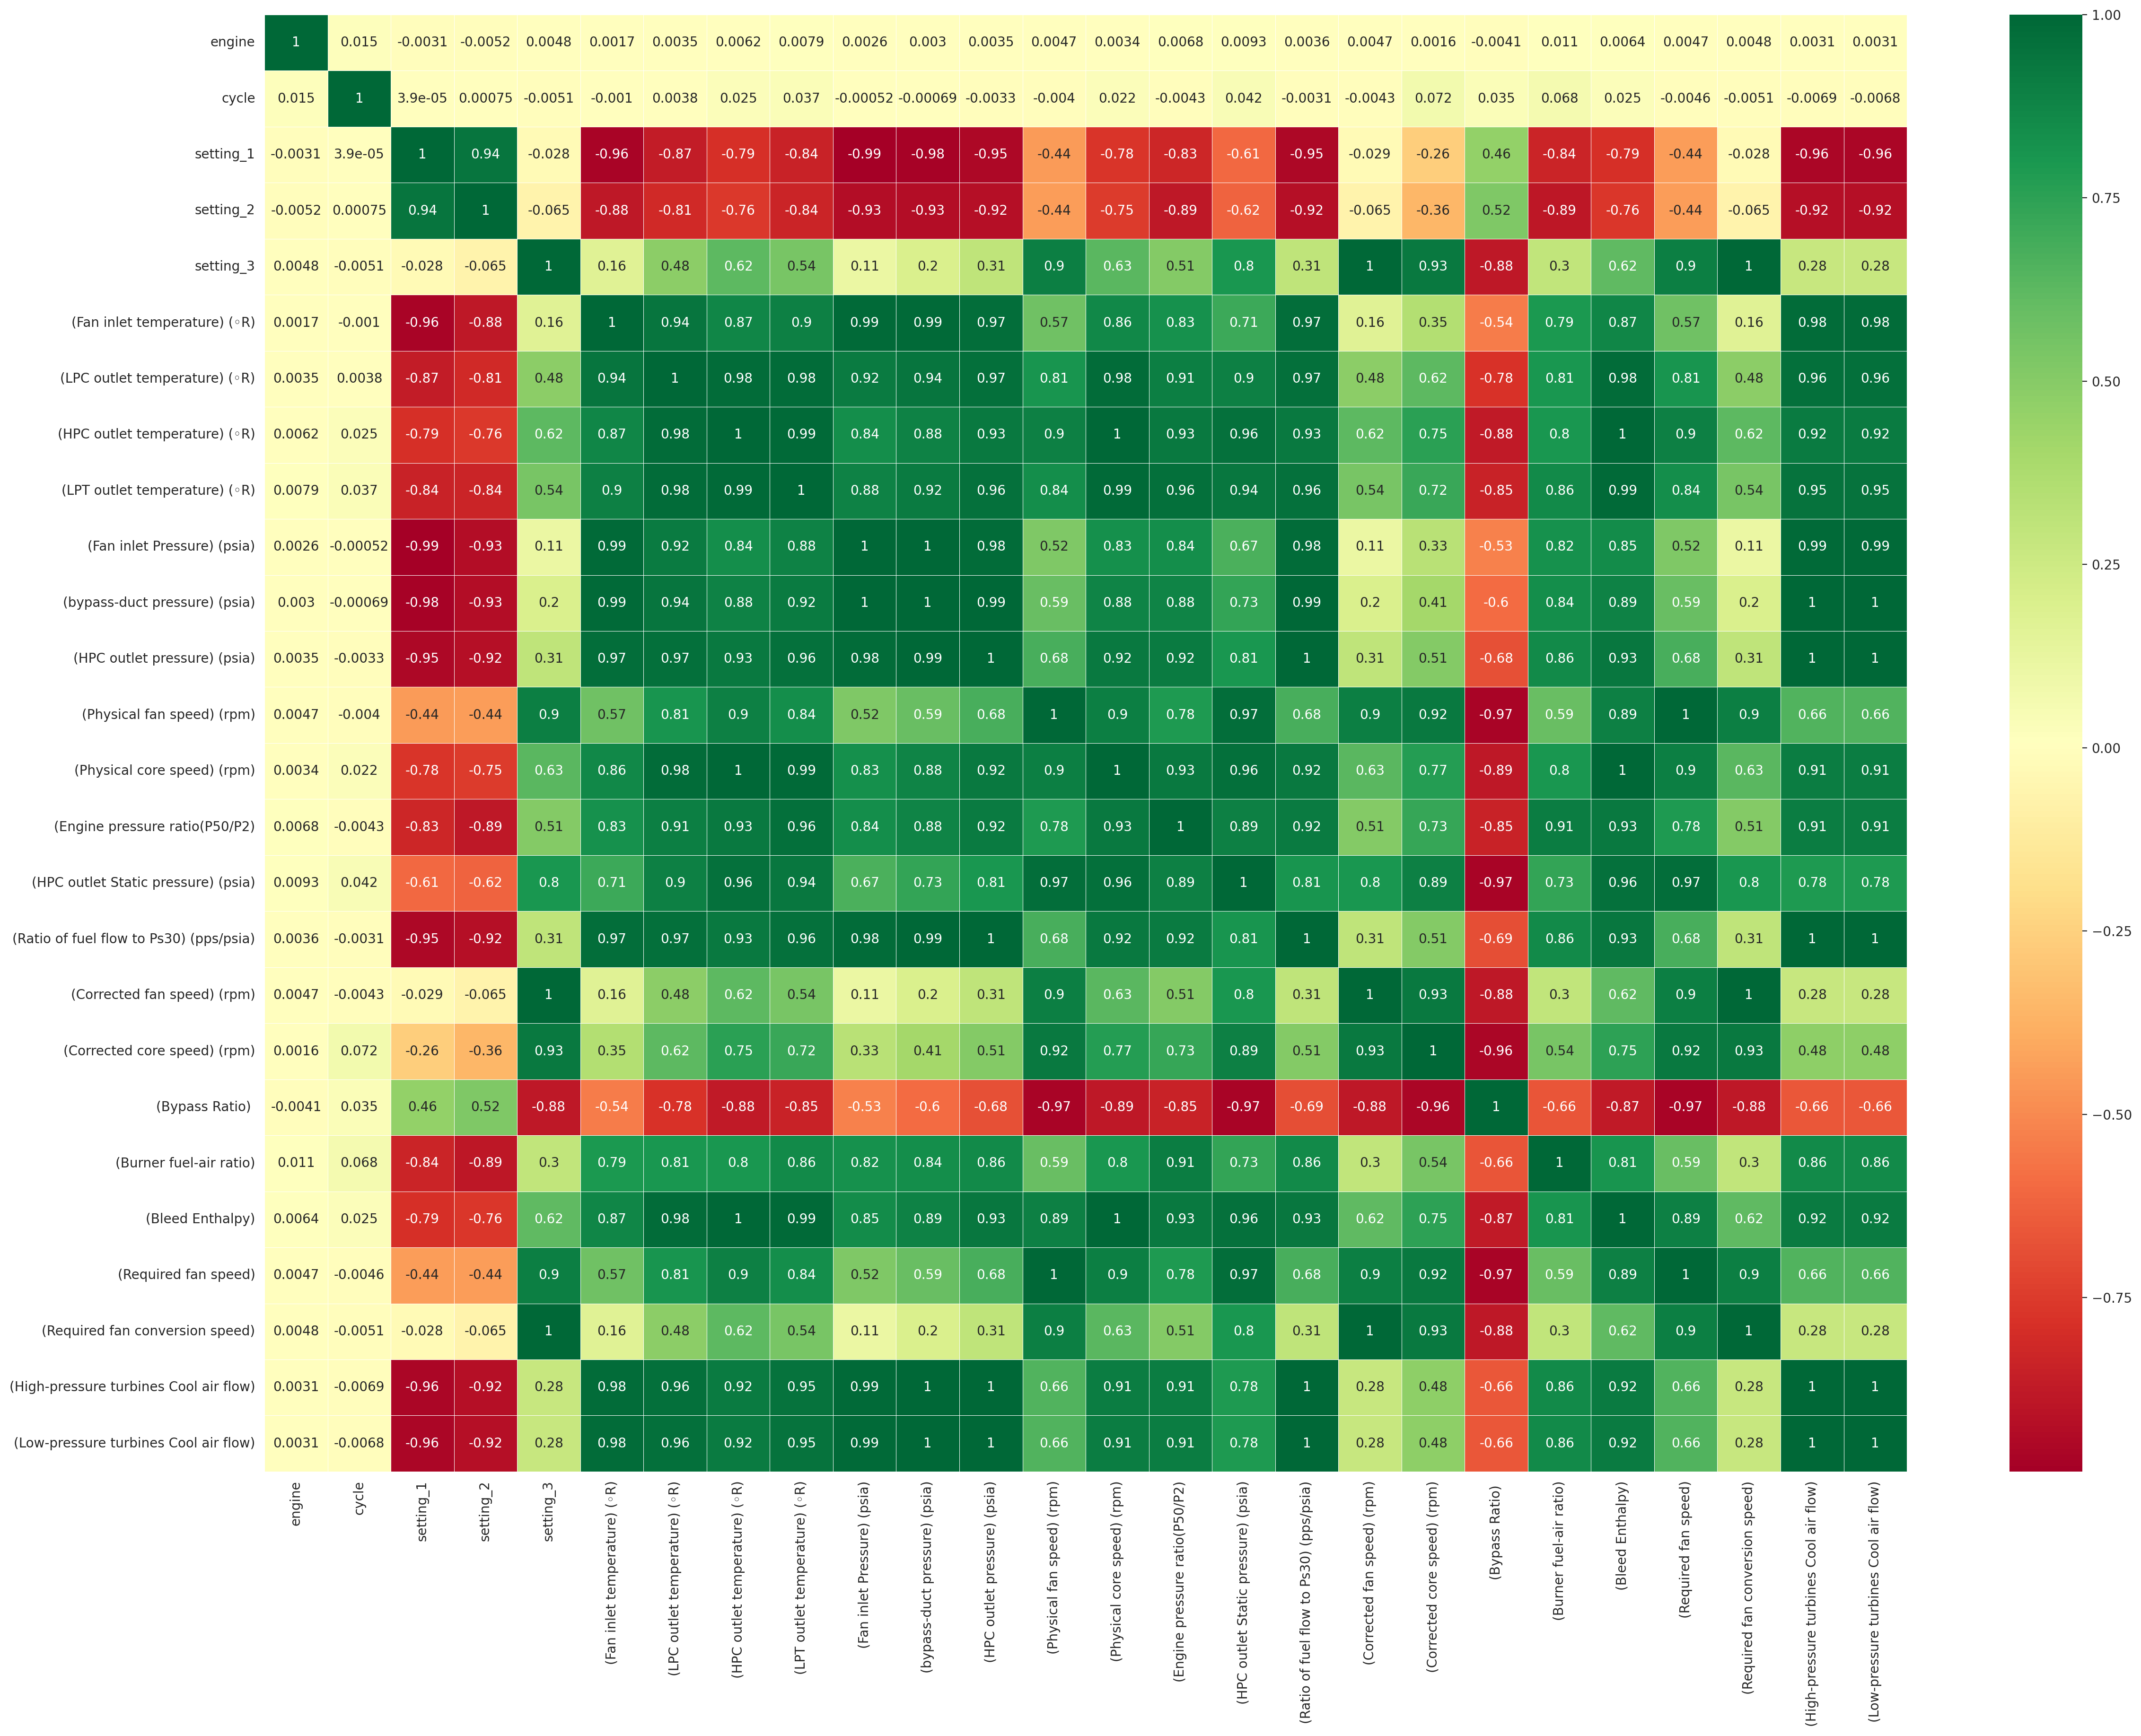

In [ ]:
plt.figure(figsize = (28, 20))

sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
# fig.set_size_inches(20,20)
plt.show()

# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


In [ ]:
# Features to use for PCA
feature_cols = setting_names + sensor_names

X_train = df_train[feature_cols].values
X_test  = df_test[feature_cols].values


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
pca = PCA(n_components=0.50, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Original features:", X_train.shape[1])
print("PCA features:", X_train_pca.shape[1])


Original features: 24
PCA features: 1


In [ ]:
pca = PCA(n_components=10, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


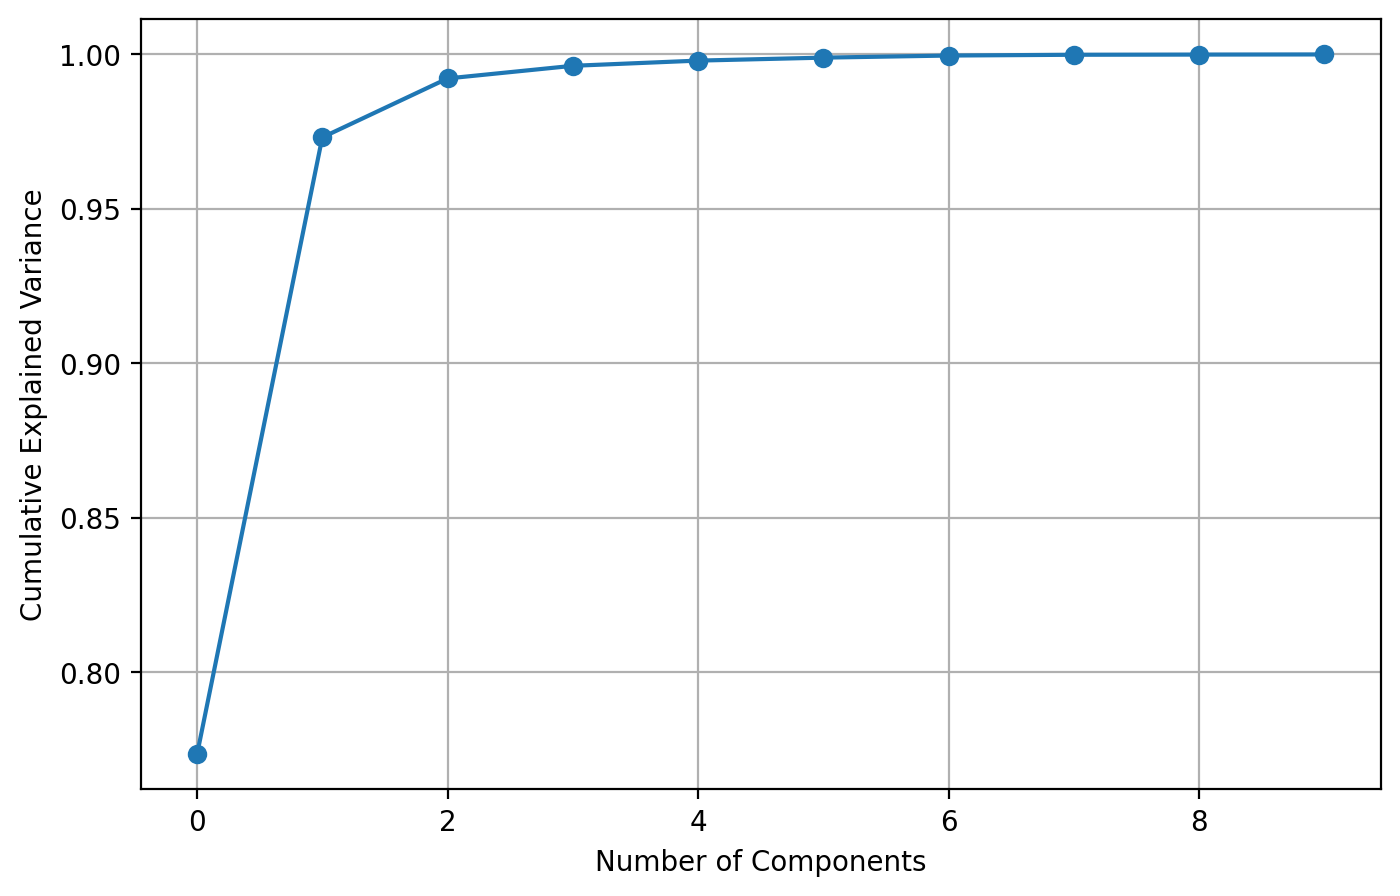

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [ ]:
pca_cols = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]

df_train_pca = pd.DataFrame(X_train_pca, columns=pca_cols)
df_test_pca  = pd.DataFrame(X_test_pca, columns=pca_cols)

# Add back engine & cycle if needed
df_train_pca = pd.concat([df_train[index_names].reset_index(drop=True),
                           df_train_pca], axis=1)

df_test_pca = pd.concat([df_test[index_names].reset_index(drop=True),
                          df_test_pca], axis=1)


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=feature_cols,
    columns=pca_cols
)

print(loadings)


                                              PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9      PC10
setting_1                               -0.191857  0.252839 -0.006757 -0.036295  0.246527 -0.108010  0.654769  0.305579  0.038765  0.019778
setting_2                               -0.189880  0.224867 -0.385005  0.409507 -0.119721  0.290862 -0.294017 -0.167101 -0.042906 -0.083486
setting_3                                0.134141  0.372245 -0.028096  0.020667 -0.204378 -0.018917  0.041930 -0.057635 -0.012261 -0.027176
(Fan inlet temperature) (◦R)             0.205165 -0.195029 -0.255356  0.146990  0.259074 -0.095298 -0.130013  0.441210 -0.053597 -0.074842
(LPC outlet temperature) (◦R)            0.227346 -0.049289 -0.235174  0.135948  0.163761 -0.073110 -0.056454  0.267501 -0.052155 -0.073997
(HPC outlet temperature) (◦R)            0.230472  0.026035 -0.125399  0.095442  0.163585 -0.104592 -0.026889 -0.150793  0.893072  0.156137
(LPT outlet temperat

In [ ]:
pca = PCA(n_components=2, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


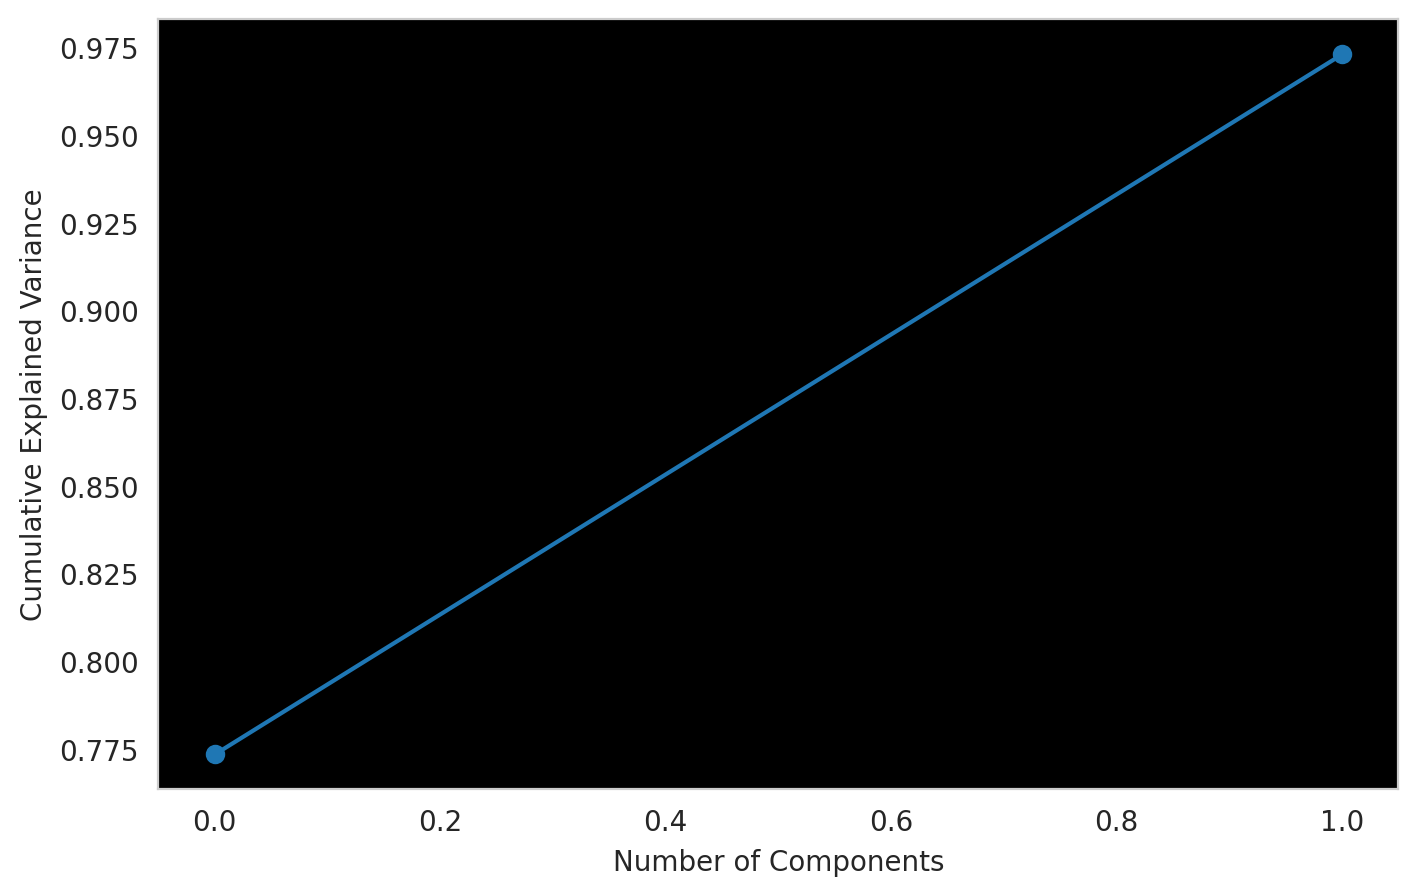

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [ ]:
pca_cols = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]

df_train_pca = pd.DataFrame(X_train_pca, columns=pca_cols)
df_test_pca  = pd.DataFrame(X_test_pca, columns=pca_cols)

# Add back engine & cycle if needed
df_train_pca = pd.concat([df_train[index_names].reset_index(drop=True),
                           df_train_pca], axis=1)

df_test_pca = pd.concat([df_test[index_names].reset_index(drop=True),
                          df_test_pca], axis=1)


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=feature_cols,
    columns=pca_cols
)

print(loadings)

                                              PC1       PC2
setting_1                               -0.191857  0.252839
setting_2                               -0.189880  0.224867
setting_3                                0.134141  0.372245
(Fan inlet temperature) (◦R)             0.205165 -0.195029
(LPC outlet temperature) (◦R)            0.227346 -0.049289
(HPC outlet temperature) (◦R)            0.230472  0.026035
(LPT outlet temperature) (◦R)            0.231311 -0.016548
(Fan inlet Pressure) (psia)              0.202397 -0.220196
(bypass-duct pressure) (psia)            0.211297 -0.185254
(HPC outlet pressure) (psia)             0.220793 -0.137230
(Physical fan speed) (rpm)               0.200910  0.224369
(Physical core speed) (rpm)              0.230308  0.034727
(Engine pressure ratio(P50/P2)           0.223096 -0.023520
(HPC outlet Static pressure) (psia)      0.219728  0.142612
(Ratio of fuel flow to Ps30) (pps/psia)  0.220896 -0.136610
(Corrected fan speed) (rpm)             

# choosing top 20 features by only PC1 values

In [ ]:
# Importance based on PC1
importance_sorted = loadings['PC1'].abs().sort_values(ascending=False).head(20)

In [ ]:
# Top 20 features
top_20_features = importance_sorted.head(20)

top_20_features

,PC1
(LPT outlet temperature) (◦R),0.231311
(Bleed Enthalpy),0.230568
(HPC outlet temperature) (◦R),0.230472
(Physical core speed) (rpm),0.230308
(LPC outlet temperature) (◦R),0.227346
(Engine pressure ratio(P50/P2),0.223096
(Ratio of fuel flow to Ps30) (pps/psia),0.220896
(HPC outlet pressure) (psia),0.220793
(HPC outlet Static pressure) (psia),0.219728
(High-pressure turbines Cool air flow),0.218352


In [ ]:
top_20_feature_names = top_20_features.index.tolist()
top_20_feature_names

['(LPT outlet temperature) (◦R)',
 '(Bleed Enthalpy)',
 '(HPC outlet temperature) (◦R)',
 '(Physical core speed) (rpm)',
 '(LPC outlet temperature) (◦R)',
 '(Engine pressure ratio(P50/P2)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(HPC outlet pressure) (psia)',
 '(HPC outlet Static pressure) (psia)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)',
 '(bypass-duct pressure) (psia)',
 '(Fan inlet temperature) (◦R)',
 '(Fan inlet Pressure) (psia)',
 '(Bypass Ratio) ',
 '(Physical fan speed) (rpm)',
 '(Required fan speed)',
 '(Burner fuel-air ratio)',
 'setting_1',
 'setting_2']

In [ ]:
df_train_top20 = df_train[index_names + top_20_feature_names]
df_test_top20  = df_test[index_names + top_20_feature_names]

In [ ]:
df_train_top20.head()

,engine,cycle,(LPT outlet temperature) (◦R),(Bleed Enthalpy),(HPC outlet temperature) (◦R),(Physical core speed) (rpm),(LPC outlet temperature) (◦R),(Engine pressure ratio(P50/P2),(Ratio of fuel flow to Ps30) (pps/psia),(HPC outlet pressure) (psia),(HPC outlet Static pressure) (psia),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),(bypass-duct pressure) (psia),(Fan inlet temperature) (◦R),(Fan inlet Pressure) (psia),(Bypass Ratio),(Physical fan speed) (rpm),(Required fan speed),(Burner fuel-air ratio),setting_1,setting_2
0,1,1,1137.23,334,1358.61,8341.91,555.32,1.02,183.06,194.64,42.02,14.73,8.8071,8.00,449.44,5.48,9.3461,2222.65,2223,0.02,34.9983,0.8400
1,1,2,1125.78,330,1353.22,8303.96,549.90,1.02,130.42,138.51,42.20,10.41,6.2665,5.71,445.00,3.91,9.3774,2211.57,2212,0.02,41.9982,0.8408
2,1,3,1047.45,309,1256.76,8001.42,537.31,0.94,164.22,175.71,36.69,14.08,8.6723,9.02,462.54,7.05,10.8941,1915.11,1915,0.02,24.9988,0.6218
3,1,4,1126.38,329,1354.03,8303.96,549.51,1.02,130.72,138.46,41.96,10.59,6.4701,5.71,445.00,3.91,9.3528,2211.58,2212,0.02,42.0077,0.8416
4,1,5,1047.93,309,1257.71,7993.23,537.07,0.94,164.31,175.05,36.89,14.13,8.5286,9.03,462.54,7.05,10.8963,1915.10,1915,0.02,25.0005,0.6203


In [ ]:
df_train_top20.shape

(53759, 22)

# preparing data for training

In [ ]:
# Compute RUL for training data
df_train['RUL'] = df_train.groupby('engine')['cycle'].transform('max') - df_train['cycle']


In [ ]:
selected_features = top_20_feature_names  # from previous step

train_df = df_train[['engine', 'cycle'] + selected_features + ['RUL']]
test_df  = df_test[['engine', 'cycle'] + selected_features]


NameError: name 'top_20_feature_names' is not defined

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_df[selected_features] = scaler.fit_transform(train_df[selected_features])
test_df[selected_features]  = scaler.transform(test_df[selected_features])


# LSTM

In [ ]:
import numpy as np

def create_sequences(df, seq_len, feature_cols, label_col=None):
    X, y = [], []

    for engine_id in df['engine'].unique():
        engine_data = df[df['engine'] == engine_id]
        feature_values = engine_data[feature_cols].values

        for i in range(len(engine_data) - seq_len + 1):
            X.append(feature_values[i:i+seq_len])

            if label_col:
                y.append(engine_data[label_col].iloc[i+seq_len-1])

    return np.array(X), np.array(y)


In [ ]:
SEQ_LEN = 30

X_train, y_train = create_sequences(
    train_df, SEQ_LEN, selected_features, label_col='RUL'
)


In [ ]:
def create_test_sequences(df, seq_len, feature_cols):
    X = []

    valid_engine_ids = []

    for engine_id in df['engine'].unique():
        engine_data = df[df['engine'] == engine_id]
        feature_values = engine_data[feature_cols].values

        if len(feature_values) >= seq_len:
            X.append(feature_values[-seq_len:])
            valid_engine_ids.append(engine_id)

    return np.array(X), valid_engine_ids


In [ ]:
X_test, valid_engine_ids = create_test_sequences(
    test_df, SEQ_LEN, selected_features
)

y_test = df_test_RUL.loc[
    df_test_RUL.index[:len(valid_engine_ids)], 'RUL'
].values


In [ ]:
print(X_test.shape)
print(len(y_test))


(253, 30, 10)
253


In [ ]:
# Build LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, len(selected_features))),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 64)         │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,649 (123.63 KB)

 Trainable params: 31,649 (123.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train Model
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - loss: 11121.5420 - val_loss: 8568.8242
Epoch 2/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - loss: 8258.5615 - val_loss: 6642.0898
Epoch 3/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - loss: 6494.0381 - val_loss: 5366.1953
Epoch 4/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - loss: 5306.0840 - val_loss: 4574.7212
Epoch 5/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - loss: 4563.0293 - val_loss: 4133.9941
Epoch 6/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - loss: 4214.3838 - val_loss: 3926.5513
Epoch 7/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - loss: 4034.9590 - val_loss: 3844.2319
Epoch 8/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - loss: 3956.0627 - val_loss: 3829.7122
Epoch 9/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - loss: 3942.8494 - val_loss: 3828.3384
Epoch 10/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - loss: 3916.1016 - val_loss: 3828.4934
Epoch 11/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - l

In [ ]:
# Predict & Evaluate Accuracy (RMSE)
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test).flatten()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


np.float64(55.22776215718527)

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)


R² score: -0.05685079097747803


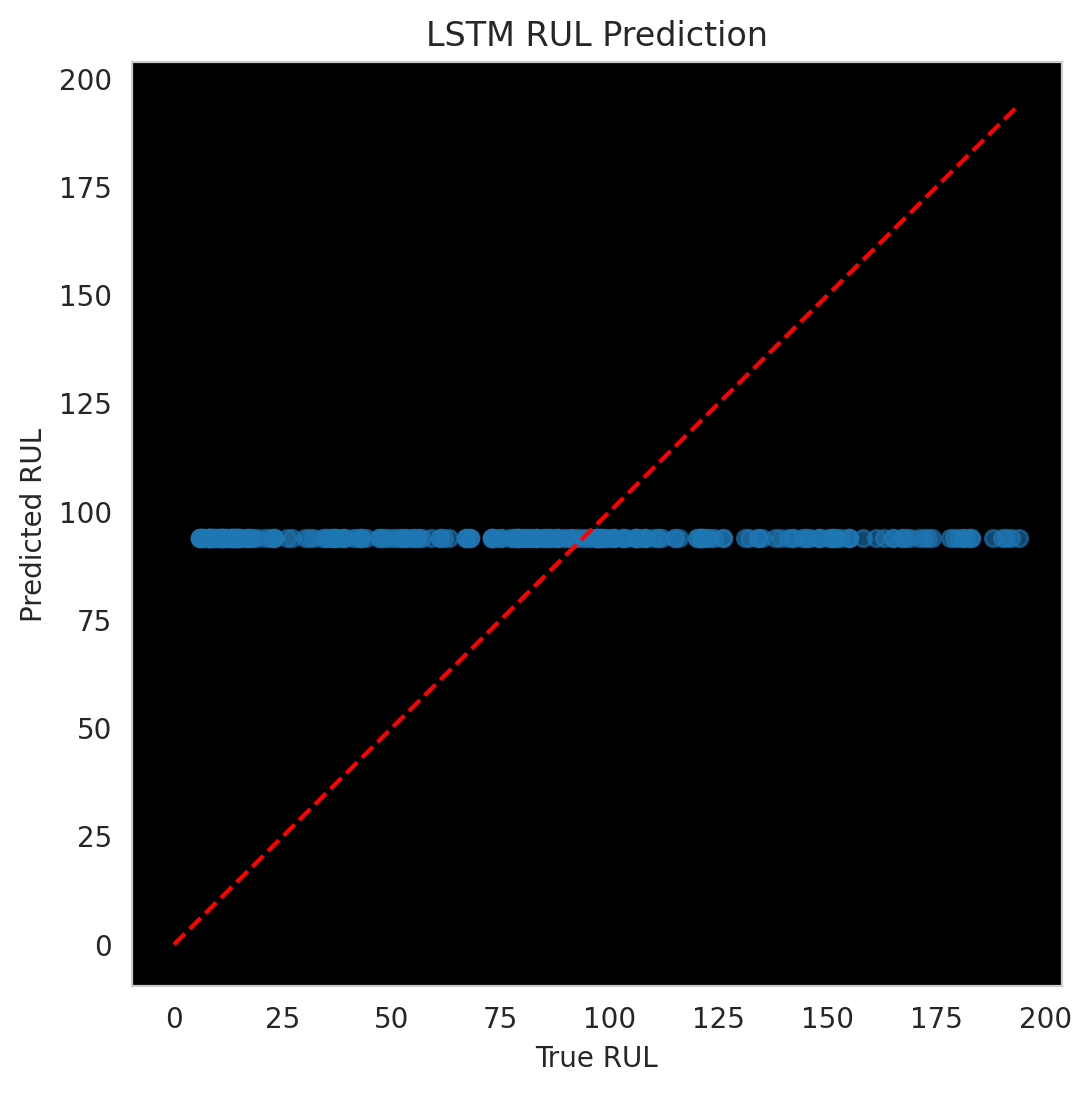

In [ ]:
# Optional: Plot Prediction vs True RUL
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("LSTM RUL Prediction")
plt.grid()
plt.show()


# Random Forest with top 20 features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)
# df_test_max

In [ ]:
# Importance based on PC1
importance_sorted = loadings['PC1'].abs().sort_values(ascending=False).head(20)

In [ ]:
# Top 20 features
top_20_features = importance_sorted.head(20)

top_20_features

,PC1
(LPT outlet temperature) (◦R),0.231311
(Bleed Enthalpy),0.230568
(HPC outlet temperature) (◦R),0.230472
(Physical core speed) (rpm),0.230308
(LPC outlet temperature) (◦R),0.227346
(Engine pressure ratio(P50/P2),0.223096
(Ratio of fuel flow to Ps30) (pps/psia),0.220896
(HPC outlet pressure) (psia),0.220793
(HPC outlet Static pressure) (psia),0.219728
(High-pressure turbines Cool air flow),0.218352


In [ ]:
feature_names = top_20_features.index.tolist()
feature_names

['(LPT outlet temperature) (◦R)',
 '(Bleed Enthalpy)',
 '(HPC outlet temperature) (◦R)',
 '(Physical core speed) (rpm)',
 '(LPC outlet temperature) (◦R)',
 '(Engine pressure ratio(P50/P2)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(HPC outlet pressure) (psia)',
 '(HPC outlet Static pressure) (psia)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)',
 '(bypass-duct pressure) (psia)',
 '(Fan inlet temperature) (◦R)',
 '(Fan inlet Pressure) (psia)',
 '(Bypass Ratio) ',
 '(Physical fan speed) (rpm)',
 '(Required fan speed)',
 '(Burner fuel-air ratio)',
 'setting_1',
 'setting_2']

In [ ]:
df_train_top20 = df_train[index_names + feature_names]
df_test_top20  = df_test[index_names + feature_names]

In [ ]:
df_train_top20.head()

,engine,cycle,(LPT outlet temperature) (◦R),(Bleed Enthalpy),(HPC outlet temperature) (◦R),(Physical core speed) (rpm),(LPC outlet temperature) (◦R),(Engine pressure ratio(P50/P2),(Ratio of fuel flow to Ps30) (pps/psia),(HPC outlet pressure) (psia),(HPC outlet Static pressure) (psia),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),(bypass-duct pressure) (psia),(Fan inlet temperature) (◦R),(Fan inlet Pressure) (psia),(Bypass Ratio),(Physical fan speed) (rpm),(Required fan speed),(Burner fuel-air ratio),setting_1,setting_2
0,1,1,1137.23,334,1358.61,8341.91,555.32,1.02,183.06,194.64,42.02,14.73,8.8071,8.00,449.44,5.48,9.3461,2222.65,2223,0.02,34.9983,0.8400
1,1,2,1125.78,330,1353.22,8303.96,549.90,1.02,130.42,138.51,42.20,10.41,6.2665,5.71,445.00,3.91,9.3774,2211.57,2212,0.02,41.9982,0.8408
2,1,3,1047.45,309,1256.76,8001.42,537.31,0.94,164.22,175.71,36.69,14.08,8.6723,9.02,462.54,7.05,10.8941,1915.11,1915,0.02,24.9988,0.6218
3,1,4,1126.38,329,1354.03,8303.96,549.51,1.02,130.72,138.46,41.96,10.59,6.4701,5.71,445.00,3.91,9.3528,2211.58,2212,0.02,42.0077,0.8416
4,1,5,1047.93,309,1257.71,7993.23,537.07,0.94,164.31,175.05,36.89,14.13,8.5286,9.03,462.54,7.05,10.8963,1915.10,1915,0.02,25.0005,0.6203


In [ ]:
df_train_top20.shape

(53759, 22)

In [ ]:
# Compute RUL for training data
df_train_top20['RUL'] = df_train_top20.groupby('engine')['cycle'].transform('max') - df_train_top20['cycle']


In [ ]:
selected_features = feature_names  # from previous step

df_train = df_train_top20[['engine', 'cycle'] + selected_features + ['RUL']]
df_test  = df_test[['engine', 'cycle'] + selected_features]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_df[selected_features] = scaler.fit_transform(train_df[selected_features])
test_df[selected_features]  = scaler.transform(test_df[selected_features])


In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=500,
                              min_samples_leaf=1,
                              max_features='sqrt',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

R-squared error: 66.21%
Root Mean Squared Error: 31.26
CPU times: user 3min 36s, sys: 4.51 s, total: 3min 40s
Wall time: 2min 19s


# Random Forest with top 16 features

In [ ]:
# Importance based on PC1
importance_sorted = loadings['PC1'].abs().sort_values(ascending=False).head(16)

In [ ]:
# Top 20 features
top_16_features = importance_sorted.head(20)

top_16_features

,PC1
(LPT outlet temperature) (◦R),0.231311
(Bleed Enthalpy),0.230568
(HPC outlet temperature) (◦R),0.230472
(Physical core speed) (rpm),0.230308
(LPC outlet temperature) (◦R),0.227346
(Engine pressure ratio(P50/P2),0.223096
(Ratio of fuel flow to Ps30) (pps/psia),0.220896
(HPC outlet pressure) (psia),0.220793
(HPC outlet Static pressure) (psia),0.219728
(High-pressure turbines Cool air flow),0.218352


In [ ]:
feature_names = top_16_features.index.tolist()
feature_names

['(LPT outlet temperature) (◦R)',
 '(Bleed Enthalpy)',
 '(HPC outlet temperature) (◦R)',
 '(Physical core speed) (rpm)',
 '(LPC outlet temperature) (◦R)',
 '(Engine pressure ratio(P50/P2)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(HPC outlet pressure) (psia)',
 '(HPC outlet Static pressure) (psia)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)',
 '(bypass-duct pressure) (psia)',
 '(Fan inlet temperature) (◦R)',
 '(Fan inlet Pressure) (psia)',
 '(Bypass Ratio) ',
 '(Physical fan speed) (rpm)']

In [ ]:
df_train_top16 = df_train[index_names + feature_names]
df_test_top16 = df_test[index_names + feature_names]

In [ ]:
df_train_top16.head()

,engine,cycle,(LPT outlet temperature) (◦R),(Bleed Enthalpy),(HPC outlet temperature) (◦R),(Physical core speed) (rpm),(LPC outlet temperature) (◦R),(Engine pressure ratio(P50/P2),(Ratio of fuel flow to Ps30) (pps/psia),(HPC outlet pressure) (psia),(HPC outlet Static pressure) (psia),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),(bypass-duct pressure) (psia),(Fan inlet temperature) (◦R),(Fan inlet Pressure) (psia),(Bypass Ratio),(Physical fan speed) (rpm)
0,1,1,1137.23,334,1358.61,8341.91,555.32,1.02,183.06,194.64,42.02,14.73,8.8071,8.00,449.44,5.48,9.3461,2222.65
1,1,2,1125.78,330,1353.22,8303.96,549.90,1.02,130.42,138.51,42.20,10.41,6.2665,5.71,445.00,3.91,9.3774,2211.57
2,1,3,1047.45,309,1256.76,8001.42,537.31,0.94,164.22,175.71,36.69,14.08,8.6723,9.02,462.54,7.05,10.8941,1915.11
3,1,4,1126.38,329,1354.03,8303.96,549.51,1.02,130.72,138.46,41.96,10.59,6.4701,5.71,445.00,3.91,9.3528,2211.58
4,1,5,1047.93,309,1257.71,7993.23,537.07,0.94,164.31,175.05,36.89,14.13,8.5286,9.03,462.54,7.05,10.8963,1915.10


In [ ]:
df_train_top16.shape

(53759, 18)

In [ ]:
# Compute RUL for training data
df_train_top16['RUL'] = df_train_top16.groupby('engine')['cycle'].transform('max') - df_train_top16['cycle']


In [ ]:
selected_features = feature_names  # from previous step

df_train = df_train_top16[['engine', 'cycle'] + selected_features + ['RUL']]
df_test  = df_test[['engine', 'cycle'] + selected_features]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_df[selected_features] = scaler.fit_transform(train_df[selected_features])
test_df[selected_features]  = scaler.transform(test_df[selected_features])


In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=500,
                              min_samples_leaf=1,
                              max_features='sqrt',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

R-squared error: 64.96%
Root Mean Squared Error: 31.84
CPU times: user 3min 53s, sys: 3.04 s, total: 3min 56s
Wall time: 2min 32s


# Random Forest with all features

In [ ]:
# Importance based on PC1
importance_sorted = loadings['PC1'].abs().sort_values(ascending=False)

In [ ]:
# Top 20 features
all_features = importance_sorted

all_features

,PC1
(LPT outlet temperature) (◦R),0.231311
(Bleed Enthalpy),0.230568
(HPC outlet temperature) (◦R),0.230472
(Physical core speed) (rpm),0.230308
(LPC outlet temperature) (◦R),0.227346
(Engine pressure ratio(P50/P2),0.223096
(Ratio of fuel flow to Ps30) (pps/psia),0.220896
(HPC outlet pressure) (psia),0.220793
(HPC outlet Static pressure) (psia),0.219728
(High-pressure turbines Cool air flow),0.218352


In [ ]:
feature_names = all_features.index.tolist()
feature_names

['(LPT outlet temperature) (◦R)',
 '(Bleed Enthalpy)',
 '(HPC outlet temperature) (◦R)',
 '(Physical core speed) (rpm)',
 '(LPC outlet temperature) (◦R)',
 '(Engine pressure ratio(P50/P2)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(HPC outlet pressure) (psia)',
 '(HPC outlet Static pressure) (psia)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)',
 '(bypass-duct pressure) (psia)',
 '(Fan inlet temperature) (◦R)',
 '(Fan inlet Pressure) (psia)',
 '(Bypass Ratio) ',
 '(Physical fan speed) (rpm)',
 '(Required fan speed)',
 '(Burner fuel-air ratio)',
 'setting_1',
 'setting_2',
 '(Corrected core speed) (rpm)',
 '(Corrected fan speed) (rpm)',
 '(Required fan conversion speed)',
 'setting_3']

In [ ]:
df_train_all = df_train[index_names + feature_names]
df_test_all = df_test[index_names + feature_names]

In [ ]:
df_train_all.head()

,engine,cycle,(LPT outlet temperature) (◦R),(Bleed Enthalpy),(HPC outlet temperature) (◦R),(Physical core speed) (rpm),(LPC outlet temperature) (◦R),(Engine pressure ratio(P50/P2),(Ratio of fuel flow to Ps30) (pps/psia),(HPC outlet pressure) (psia),(HPC outlet Static pressure) (psia),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),(bypass-duct pressure) (psia),(Fan inlet temperature) (◦R),(Fan inlet Pressure) (psia),(Bypass Ratio),(Physical fan speed) (rpm),(Required fan speed),(Burner fuel-air ratio),setting_1,setting_2,(Corrected core speed) (rpm),(Corrected fan speed) (rpm),(Required fan conversion speed),setting_3
0,1,1,1137.23,334,1358.61,8341.91,555.32,1.02,183.06,194.64,42.02,14.73,8.8071,8.00,449.44,5.48,9.3461,2222.65,2223,0.02,34.9983,0.8400,8048.56,2387.72,100.00,100.0
1,1,2,1125.78,330,1353.22,8303.96,549.90,1.02,130.42,138.51,42.20,10.41,6.2665,5.71,445.00,3.91,9.3774,2211.57,2212,0.02,41.9982,0.8408,8072.30,2387.66,100.00,100.0
2,1,3,1047.45,309,1256.76,8001.42,537.31,0.94,164.22,175.71,36.69,14.08,8.6723,9.02,462.54,7.05,10.8941,1915.11,1915,0.02,24.9988,0.6218,7864.87,2028.03,84.93,60.0
3,1,4,1126.38,329,1354.03,8303.96,549.51,1.02,130.72,138.46,41.96,10.59,6.4701,5.71,445.00,3.91,9.3528,2211.58,2212,0.02,42.0077,0.8416,8068.66,2387.61,100.00,100.0
4,1,5,1047.93,309,1257.71,7993.23,537.07,0.94,164.31,175.05,36.89,14.13,8.5286,9.03,462.54,7.05,10.8963,1915.10,1915,0.02,25.0005,0.6203,7861.23,2028.00,84.93,60.0


In [ ]:
df_train_all.shape

(53759, 26)

In [ ]:
# Compute RUL for training data
df_train_all['RUL'] = df_train_all.groupby('engine')['cycle'].transform('max') - df_train_all['cycle']


In [ ]:
len(feature_names)

24

In [ ]:
selected_features = feature_names  # from previous step

df_train = df_train_all[['engine', 'cycle'] + feature_names + ['RUL']]
df_test  = df_test[['engine', 'cycle'] + feature_names]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[feature_names] = scaler.fit_transform(df_train[feature_names])
df_test[feature_names]  = scaler.transform(df_test[feature_names])


In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=500,
                              min_samples_leaf=1,
                              max_features='sqrt',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

R-squared error: -40.66%
Root Mean Squared Error: 63.78
CPU times: user 3min 36s, sys: 6.36 s, total: 3min 42s
Wall time: 2min 24s


# Random Forest with top 22 features

In [ ]:
# Importance based on PC1
importance_sorted = loadings['PC1'].abs().sort_values(ascending=False).head(22)

In [ ]:
# Top 20 features
top22_features = importance_sorted

top22_features

,PC1
(LPT outlet temperature) (◦R),0.231311
(Bleed Enthalpy),0.230568
(HPC outlet temperature) (◦R),0.230472
(Physical core speed) (rpm),0.230308
(LPC outlet temperature) (◦R),0.227346
(Engine pressure ratio(P50/P2),0.223096
(Ratio of fuel flow to Ps30) (pps/psia),0.220896
(HPC outlet pressure) (psia),0.220793
(HPC outlet Static pressure) (psia),0.219728
(High-pressure turbines Cool air flow),0.218352


In [ ]:
len(top22_features)

22

In [ ]:
feature_names = top22_features.index.tolist()
feature_names

['(LPT outlet temperature) (◦R)',
 '(Bleed Enthalpy)',
 '(HPC outlet temperature) (◦R)',
 '(Physical core speed) (rpm)',
 '(LPC outlet temperature) (◦R)',
 '(Engine pressure ratio(P50/P2)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(HPC outlet pressure) (psia)',
 '(HPC outlet Static pressure) (psia)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)',
 '(bypass-duct pressure) (psia)',
 '(Fan inlet temperature) (◦R)',
 '(Fan inlet Pressure) (psia)',
 '(Bypass Ratio) ',
 '(Physical fan speed) (rpm)',
 '(Required fan speed)',
 '(Burner fuel-air ratio)',
 'setting_1',
 'setting_2',
 '(Corrected core speed) (rpm)',
 '(Corrected fan speed) (rpm)']

In [ ]:
df_train_22 = df_train[index_names + feature_names]
df_test_22 = df_test[index_names + feature_names]

In [ ]:
df_train_22.head()

,engine,cycle,(LPT outlet temperature) (◦R),(Bleed Enthalpy),(HPC outlet temperature) (◦R),(Physical core speed) (rpm),(LPC outlet temperature) (◦R),(Engine pressure ratio(P50/P2),(Ratio of fuel flow to Ps30) (pps/psia),(HPC outlet pressure) (psia),(HPC outlet Static pressure) (psia),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),(bypass-duct pressure) (psia),(Fan inlet temperature) (◦R),(Fan inlet Pressure) (psia),(Bypass Ratio),(Physical fan speed) (rpm),(Required fan speed),(Burner fuel-air ratio),setting_1,setting_2,(Corrected core speed) (rpm),(Corrected fan speed) (rpm)
0,1,1,0.273095,0.322917,0.311201,0.289692,0.181576,0.243243,0.136817,0.138036,0.471498,0.156036,0.159082,0.144025,0.060269,0.146592,0.369947,0.650057,0.651163,0.0,0.833134,0.997625,0.476508,0.992394
1,1,2,0.245535,0.281250,0.296600,0.258841,0.131847,0.243243,0.003297,0.004081,0.486156,0.007888,0.014562,0.000000,0.000000,0.000000,0.381407,0.626663,0.627907,0.0,0.999767,0.998575,0.533013,0.992229
2,1,3,0.056997,0.062500,0.035297,0.012893,0.016332,0.027027,0.089030,0.092860,0.037459,0.133745,0.151414,0.208176,0.238089,0.293184,0.936731,0.000718,0.000000,0.0,0.595096,0.738480,0.039296,0.001157
3,1,4,0.246979,0.270833,0.298795,0.258841,0.128269,0.243243,0.004058,0.003962,0.466612,0.014060,0.026144,0.000000,0.000000,0.000000,0.372400,0.626684,0.627907,0.0,0.999993,0.999525,0.524349,0.992091
4,1,5,0.058152,0.062500,0.037871,0.006235,0.014130,0.027027,0.089258,0.091284,0.053746,0.135460,0.143240,0.208805,0.238089,0.293184,0.937537,0.000697,0.000000,0.0,0.595137,0.736698,0.030633,0.001075


In [ ]:
df_train_22.shape

(53759, 24)

In [ ]:
# Compute RUL for training data
df_train_22['RUL'] = df_train_22.groupby('engine')['cycle'].transform('max') - df_train_22['cycle']


In [ ]:
len(feature_names)

22

In [ ]:
selected_features = feature_names  # from previous step

df_train = df_train_all[['engine', 'cycle'] + feature_names + ['RUL']]
df_test  = df_test[['engine', 'cycle'] + feature_names]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[feature_names] = scaler.fit_transform(df_train[feature_names])
df_test[feature_names]  = scaler.transform(df_test[feature_names])


In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=500,
                              min_samples_leaf=1,
                              max_features='sqrt',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

R-squared error: -44.65%
Root Mean Squared Error: 64.68
CPU times: user 3min 47s, sys: 4.53 s, total: 3min 52s
Wall time: 2min 24s


# Random Forest with top 10 features

In [ ]:
# Importance based on PC1
importance_sorted = loadings['PC1'].abs().sort_values(ascending=False).head(10)

In [ ]:
# Top 20 features
top10_features = importance_sorted

top10_features

,PC1
(LPT outlet temperature) (◦R),0.231311
(Bleed Enthalpy),0.230568
(HPC outlet temperature) (◦R),0.230472
(Physical core speed) (rpm),0.230308
(LPC outlet temperature) (◦R),0.227346
(Engine pressure ratio(P50/P2),0.223096
(Ratio of fuel flow to Ps30) (pps/psia),0.220896
(HPC outlet pressure) (psia),0.220793
(HPC outlet Static pressure) (psia),0.219728
(High-pressure turbines Cool air flow),0.218352


In [ ]:
len(top10_features)

10

In [ ]:
feature_names = top10_features.index.tolist()
feature_names

['(LPT outlet temperature) (◦R)',
 '(Bleed Enthalpy)',
 '(HPC outlet temperature) (◦R)',
 '(Physical core speed) (rpm)',
 '(LPC outlet temperature) (◦R)',
 '(Engine pressure ratio(P50/P2)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(HPC outlet pressure) (psia)',
 '(HPC outlet Static pressure) (psia)',
 '(High-pressure turbines Cool air flow)']

In [ ]:
df_train_10 = df_train[index_names + feature_names]
df_test_10 = df_test[index_names + feature_names]

In [ ]:
df_train_10.head()

,engine,cycle,(LPT outlet temperature) (◦R),(Bleed Enthalpy),(HPC outlet temperature) (◦R),(Physical core speed) (rpm),(LPC outlet temperature) (◦R),(Engine pressure ratio(P50/P2),(Ratio of fuel flow to Ps30) (pps/psia),(HPC outlet pressure) (psia),(HPC outlet Static pressure) (psia),(High-pressure turbines Cool air flow)
0,1,1,0.273095,0.322917,0.311201,0.289692,0.181576,0.243243,0.136817,0.138036,0.471498,0.156036
1,1,2,0.245535,0.281250,0.296600,0.258841,0.131847,0.243243,0.003297,0.004081,0.486156,0.007888
2,1,3,0.056997,0.062500,0.035297,0.012893,0.016332,0.027027,0.089030,0.092860,0.037459,0.133745
3,1,4,0.246979,0.270833,0.298795,0.258841,0.128269,0.243243,0.004058,0.003962,0.466612,0.014060
4,1,5,0.058152,0.062500,0.037871,0.006235,0.014130,0.027027,0.089258,0.091284,0.053746,0.135460


In [ ]:
df_train_10.shape

(53759, 12)

In [ ]:
# Compute RUL for training data
df_train_10['RUL'] = df_train_10.groupby('engine')['cycle'].transform('max') - df_train_10['cycle']


In [ ]:
len(feature_names)

10

In [ ]:
selected_features = feature_names  # from previous step

df_train = df_train_all[['engine', 'cycle'] + feature_names + ['RUL']]
df_test  = df_test[['engine', 'cycle'] + feature_names]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[feature_names] = scaler.fit_transform(df_train[feature_names])
df_test[feature_names]  = scaler.transform(df_test[feature_names])


In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=500,
                              min_samples_leaf=1,
                              max_features='sqrt',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

R-squared error: -83.78%
Root Mean Squared Error: 72.90
CPU times: user 3min 22s, sys: 2.53 s, total: 3min 25s
Wall time: 2min 5s


# choosing top 20 weighted features by explained variance:

In [ ]:
importance = (loadings.abs() * pca.explained_variance_ratio_).sum(axis=1)
importance_sorted = importance.sort_values(ascending=False).head(20)


,0
(Fan inlet Pressure) (psia),0.200501
(bypass-duct pressure) (psia),0.200410
(Physical fan speed) (rpm),0.200184
(Required fan speed),0.200176
(Low-pressure turbines Cool air flow),0.199070
(High-pressure turbines Cool air flow),0.199068
(Bypass Ratio),0.198870
setting_1,0.198864
(HPC outlet Static pressure) (psia),0.198419
(HPC outlet pressure) (psia),0.198169
